In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def scrape_stats(base_url, year_sart, year_end):
    years = range(year_sart, year_end+1, 1)

    final_df = pd.DataFrame()

    for year in years:
        print('Extraindo ano {}'.format(year))
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table', {'id':'totals_stats'})
        df = pd.read_html(str(table))[0]
        df['Year'] = year

        final_df = final_df.append(df)
    
    return final_df

In [6]:
url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'
df = scrape_stats(url, 2013, 2018)

Extraindo ano 2013
Extraindo ano 2014
Extraindo ano 2015
Extraindo ano 2016
Extraindo ano 2017
Extraindo ano 2018


In [8]:
# Removendo as linhas que contém o mesmo valor dos nomes das colunas
drop_indexes = df[df['Rk'] == 'Rk'].index
df.drop(drop_indexes, inplace=True)


In [9]:
# Apontando colunas numéricas
numeric_cols = df.columns.drop(['Player', 'Pos', 'Tm'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

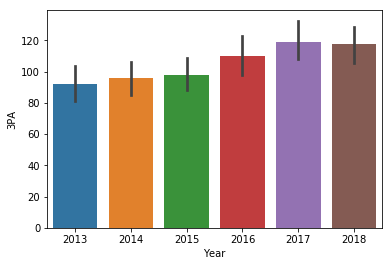

In [15]:
# Gráfico de bolas de 3 pontos arremessadas por ano
sns.barplot(x=df['Year'], y=df['3PA'])

In [21]:
# Ordena DF por bola de 3 pontos convertidas (decrescente)
sorted_df = df.sort_values(by=['3P'], axis=0, ascending=False)
sorted_df[['Player', '3P', 'Year']].head()

,Player,3P,Year
121,Stephen Curry,402,2016
124,Stephen Curry,324,2017
140,Stephen Curry,286,2015
123,Stephen Curry,272,2013
542,Klay Thompson,268,2017


In [26]:
# Agrupando por jogador e somando os valores
grouped_df = df.groupby('Player', as_index=False).sum()

# Ordena DF por bola de 3 pontos convertidas (decrescente)
sorted_df = grouped_df.sort_values(by=['3P'], axis=0, ascending=False)
sorted_df[['Player', '3P', '3PA']].head()

,Player,3P,3PA
796,Stephen Curry,1496,3422
370,James Harden,1327,3659
532,Kyle Korver,1241,2746
519,Klay Thompson,1170,2774
171,Damian Lillard,1051,2893
